# Evaluation of color terms when linking to PanSTARRS catalogs

INput is based on ODI quickreduce run on ODI calibration fields (typically 60s to 120s in g' r' i' z', 600 sec in u'). Quickreduce pairs instrumental aperture photometry from ODI image with reference catalog. Of interest here are the color terms only.


In [1]:
%matplotlib inline

import numpy as np                  # array manipulation
import astropy.io.fits as fits      # fits file manipulation
import matplotlib.pyplot as plt

plt.matplotlib.rcParams['figure.figsize'] = (8,6.0)

plt.gcf().autofmt_xdate()

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 999;

<IPython.core.display.Javascript object>

In [5]:
def processCatalog (file, refmagName, refcolmagName):
    
    # readint the catalog

    f = fits.open (file)
    phottable = f['CAT.PHOTCALIB'].data

    odimag = phottable['ODI_MAG_d30']
    odierr = phottable['ODI_ERR_d30']
    refmag = phottable[refmagName]
    referr = phottable[refmagName.replace("REF_","REF_ERR_")]
    
    refcol = refmag - phottable[refcolmagName]

    deltamag = odimag - refmag

    deltaerr = np.sqrt (np.square (referr) + np.square (odierr))

    smallerror = deltaerr < 0.05

    
    # mage a color fit
    fig = plt.figure()

    _x = refcol[smallerror]
    _y = deltamag[smallerror]
    plt.plot (_x, _y, ".")

    order = 1
    fit = np.polyfit (_x, _y,order)
    print fit
    fiterror = np.abs (_y - np.polyval (fit, _x))
    fit = np.polyfit (_x[fiterror <0.5], _y[fiterror < 0.5], order)
    
    
    _fx = np.arange(-1,2, 0.2)
    _fy = np.polyval (fit, _fx)

    plt.plot ( _fx,_fy)
    plt.title ("Color term fit")
    plt.xlabel ("%s - %s" % (refmagName, refcolmagName))
    plt.ylabel ("ODIMAG - %s" % refmagName)
    
    # make a color corrected plot
    fig = plt.figure ()
    
    correction = np.polyval (fit,refcol)
    residual = deltamag[smallerror] -correction[smallerror]
    std = np.std (residual)
    plt.plot (refmag[smallerror], residual, ".")
    plt.xlabel ("%s" % refmagName)
    plt.ylabel ("ODIMAG - %s - colorterm" % (refmagName))
    plt.title ("Color corrected %s stddev: %4.2f" % (fit [::-1], std))
    plt.ylim ([-0.2,0.2])

[  0.25119311 -31.20994774]
[  1.53251315e-02  -3.12014057e+01]
[  1.47405163e-02  -3.08525270e+01]
[  0.12366362 -29.98149837]


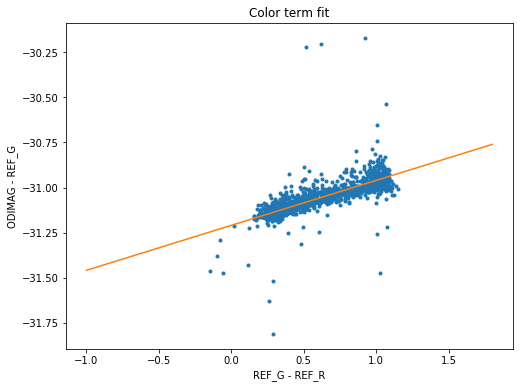

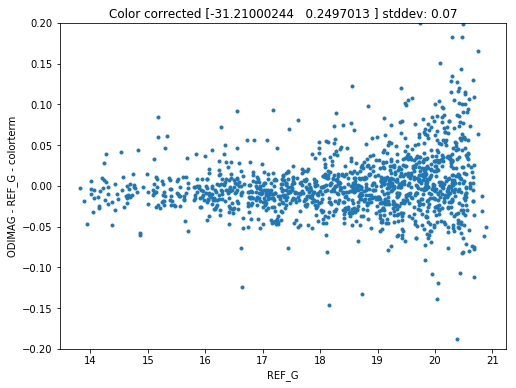

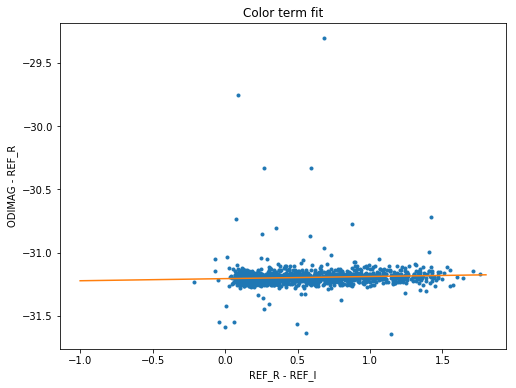

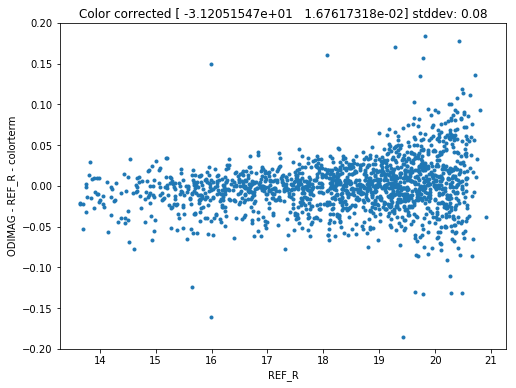

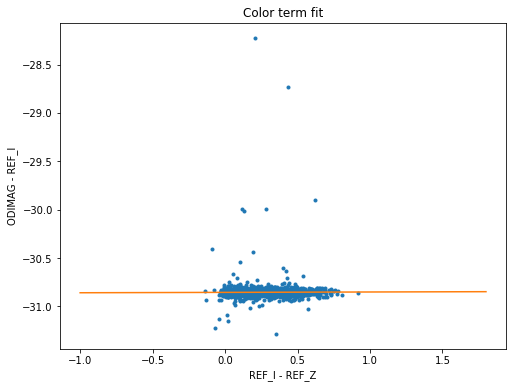

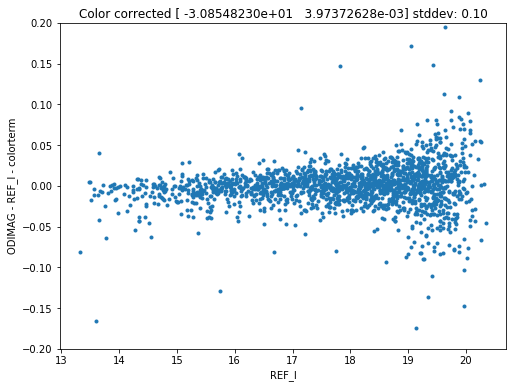

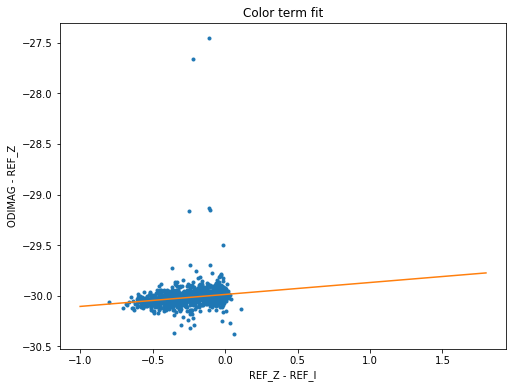

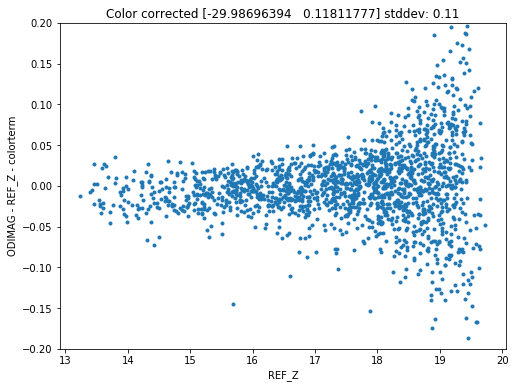

In [6]:
processCatalog ("/mnt/odiscratch/qr/20170131T033657.1.fits", 'REF_G', 'REF_R')
processCatalog ("/mnt/odiscratch/qr/20170131T033023.1.fits", 'REF_R', 'REF_I')
processCatalog ("/mnt/odiscratch/qr/20170131T033350.1.fits", 'REF_I', 'REF_Z')
processCatalog ("/mnt/odiscratch/qr/20170131T034008.1.fits", 'REF_Z', 'REF_I')